# Characteristics that Influence Trip Duration
## By Alessia Tidman

### Introduction
In this investigation, I wanted to explore the characterics which influence the duration of a trip on Ford's GoBike. Here, I looked at characteristics such as Age and Gender.

### Dataset Overview
The data consisted of trip duration and variables of about 183,400 GoBike trips from February 2019 covering the San Fransisco area. Variables included Gender, Birth Year (this was used to determine Age of user) and User Type.

In [3]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [4]:
#loading cleaned dataset
rides = pd.read_csv('ford_gobike_master.csv')
rides.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984,Male,No
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989,Other,No
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,1959,Male,No


### Duration of Trips

Initially, look at duration of trips seemed unreasonable as the range of values was very large - this was converted to minutes.

Despite being converted, the duration of trips still took on a large range of values - with the shortest being a bout a minute and 1400 minutes being the longest trip recorded. Converting to a logarithmic scale, the distribution of trip duration takes on unimodal shape, with a peak at around 10 minutes.

In [5]:
rides['duration_min']=rides['duration_sec']/60

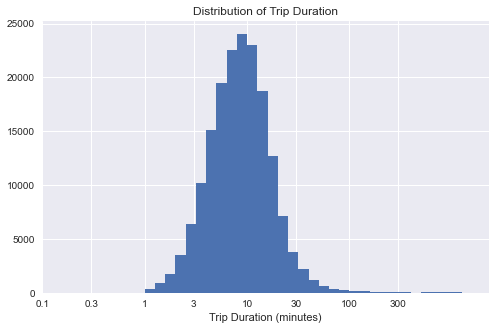

In [11]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(rides['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.style.use('seaborn')
plt.figure(figsize=[8, 5])
plt.hist(data = rides, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (minutes)')
plt.title('Distribution of Trip Duration');

### Distribution of Age
Next, looking at Age we can see that there is a right skew with the peak beging around the 30 year age mark. You can also see that majority of users are over the age of 30.

In [8]:
#Calculate Age
rides['age']=2019 - rides['member_birth_year']

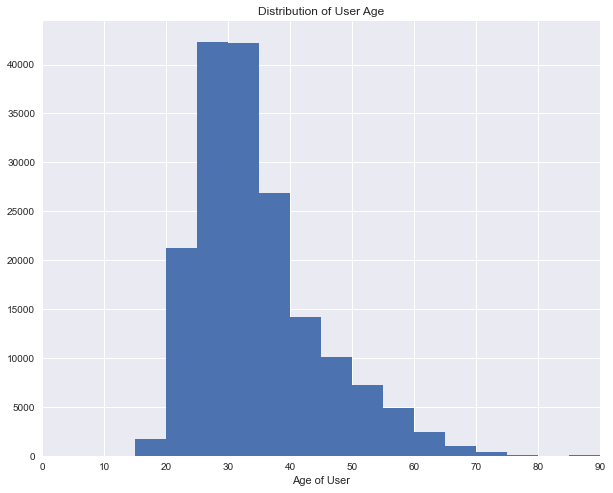

In [13]:
binsize = 5
bins = np.arange(15, rides['age'].max()+binsize, binsize)

plt.style.use('seaborn')
plt.figure(figsize=[10, 8])
plt.hist(data = rides, x = 'age', bins = bins)
plt.xlim(0, 90)
plt.xlabel('Age of User')
plt.title('Distribution of User Age');

### Gender Split
As we are able to look at the users based on Gender, I thought it would be interesting to see if one uses the service more than the other. In the first visualisation, we can see that almost 75% of users are male whereas women make up only 23.3%. 

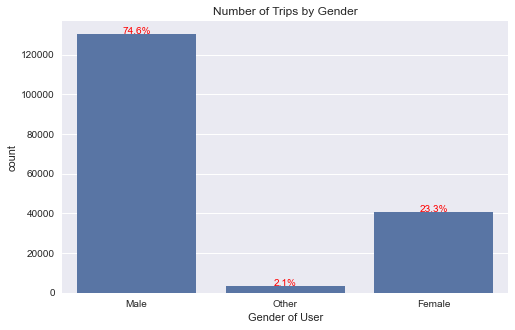

In [31]:
plt.style.use('seaborn')
plt.figure(figsize=[8, 5])

base_color = sb.color_palette()[0]
sb.countplot(data = rides, x = 'member_gender', color = base_color)
plt.title('Number of Trips by Gender')
plt.xlabel('Gender of User')

n_points = rides.shape[0]
gender_counts = rides['member_gender'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = gender_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', color='r')

plt.show()

### Duration vs. Gender

Looking at a subset trips (those less than 60 minutes), we can see that there isn't too much differentation between the categories in terms of duration of trips. All three plots look very similar, with the median trip being around 10 minutes.

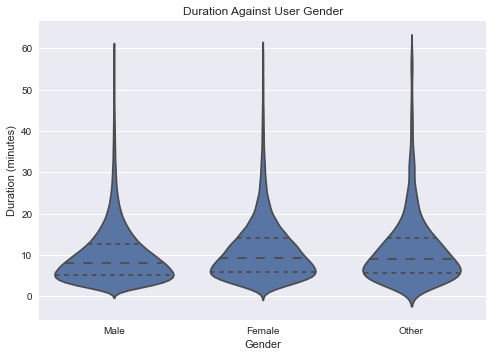

In [18]:
rides_sub=rides.query("duration_min < 60")
plt.style.use('seaborn')
base_color = sb.color_palette()[0]
sb.violinplot(data=rides_sub, x='member_gender', y='duration_min', color=base_color, inner='quartile')
plt.xlabel('Gender')
plt.ylabel('Duration (minutes)')
plt.title('Duration Against User Gender');

### Duration vs. Age

Looking at Duration and Age, we can see that those between the ages of 27 and 35 took the longest trips. Morever, we can see that as the user gets older the trip duration reduces which is an area that could be looked into further.

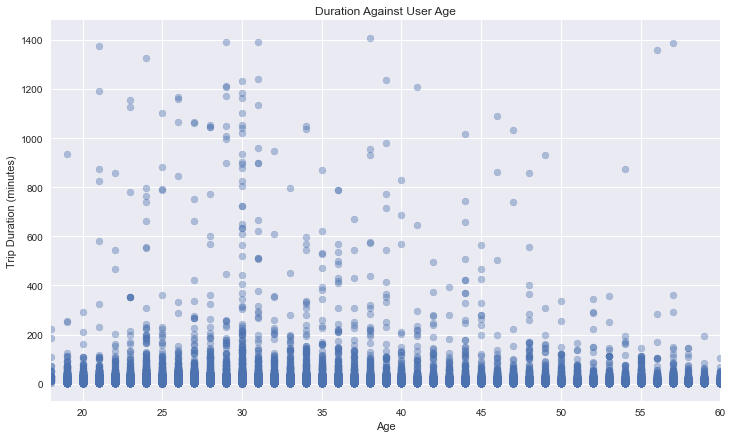

In [20]:
plt.style.use('seaborn')
plt.figure(figsize = [12, 7])
plt.scatter(data = rides, x = 'age', y = 'duration_min', alpha = 0.4)
plt.xlabel('Age')
plt.xlim(18, 60)
plt.ylabel('Trip Duration (minutes)')
plt.title('Duration Against User Age');

### Duration vs. Gender & Age
In the first graph showing duration by gender and age, we can see that 10-19 group took the longest trips for Men and Women. This could be done to factors such as fitness levels or potentially needing to travel further to places such as school.

We can also see that the group who took the second longest trips were those older than 50 which is suprising. This may be down to have more free time due to less commitments.

In [21]:
age_bins = [0, 19, 29, 39, 49, 59,
            69, 79, 89, 99]
age_labels = ['10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59',
              '60 - 69', '70 - 79', '80 - 89', '90 - 99']

rides['age_group'] = pd.cut(rides['age'], bins = age_bins, labels = age_labels, right = False)

In [28]:
rides_age = rides[(rides['age']<=60)&(rides['duration_min']<60)]

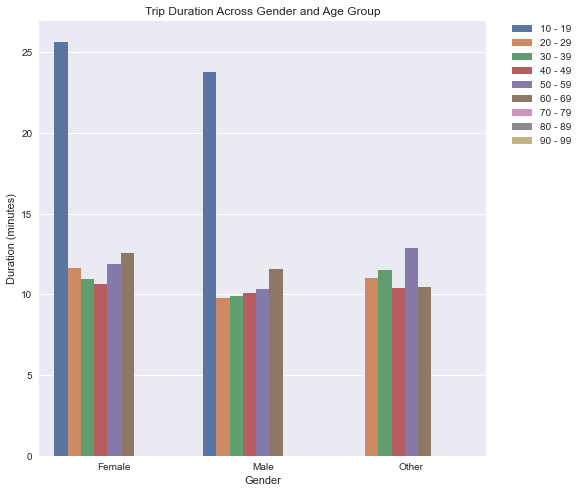

In [30]:
plt.style.use('seaborn')
plt.figure(figsize = [8, 8])
ax = sb.barplot(x='member_gender', y = 'duration_min', hue='age_group', data=rides_age.sort_values(by= 'age_group'),ci=None,palette="deep")
plt.title('Trip Duration Across Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Duration (minutes)')
leg = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)